# Project 1: Comparison-based Sorting Algorithms  
# Submitted by Hemanth Gaddipati: 801169527

In [1]:
from time import time
import random
import sys
sys.setrecursionlimit(30000)

def random_number_generator(n):
    array = set()
    while len(array) < n:
        array.add(random.randint(1,n))
    array = list(array)
    random.shuffle(array)
    return array


In [2]:
def insertionsort(array):
    # loop from arr[1] to arr[n]
    for i in range(1, len(array)):
        current_element = array[i]
        # Now we iterate backwords from i to 0 and compare the values with the current element 
        j = i-1
        while j >= 0 and current_element < array[j]:
            array[j + 1] = array[j]
            j -= 1
        array[j + 1] = current_element
    return array

In [3]:
def mergeSort(array):
    if len(array)>1: 
        mid_pos = len(array)//2
        left = array[:mid_pos] 
        right = array[mid_pos:] 
        
        sorted_left = mergeSort(left) 
        sorted_right = mergeSort(right)   
        array =[]   
        while len(sorted_left)>0 and len(sorted_right)>0: 
            if sorted_left[0] < sorted_right[0]: 
                array.append(sorted_left[0]) 
                sorted_left.pop(0) 
            else: 
                array.append(sorted_right[0]) 
                sorted_right.pop(0)  
        for i in sorted_left: 
            array.append(i) 
        for i in sorted_right: 
            array.append(i) 
    #print("Time taken to execute Merge Sort is : ",datetime.now()-starttime,"\n")
    return array

In [4]:
def heapify(array, length, index): 
    max_element = index 
    left = 2 * index + 1
    right = 2 * index + 2  
    # See if left child of root exists and is greater than root 
    if left < length and array[index] < array[left]: 
        max_element = left  
    # See if right child of root exists and is greater than root 
    if right < length and array[max_element] < array[right]: 
        max_element = right
    if max_element != index: 
        array[index],array[max_element] = array[max_element],array[index] 
        heapify(array, length, max_element)
        
def heapSort(array): 
    length = len(array)  
    for i in range(length//2 - 1, -1, -1): 
        heapify(array, length, i)  
    for i in range(length-1, 0, -1): 
        array[i], array[0] = array[0], array[i]
        heapify(array, i, 0)
        
    return array

In [5]:
def partition(array, first, last):
    if last - first > 0:
        pivot, left, right = array[first],first, last
        while left <= right:
            while array[left] < pivot:
                left += 1
            while array[right] > pivot:
                right -= 1
            if left <= right:
                array[left], array[right] = array[right], array[left]
                left += 1
                right -= 1
        partition(array, first, right)
        partition(array, left, last)
        
def quicksort(array):
    partition(array, 0, len(array) - 1)
    return array

In [6]:
def MedianOfThree(arr, left, right):
    mid = (left + right)//2
    if arr[right] < arr[left]:
        array[left],array[right] = array[right],array[left]       
    if arr[mid] < arr[left]:
        array[left],array[mid] = array[mid],array[left]
    if arr[right] < arr[mid]:
        array[right],array[mid] = array[mid],array[right]
    return arr[mid]

def modifiedpartition(array, first, last):
    if last - first > 0:
        left, right = first, last
        pivot = MedianOfThree(array,first,last)
        while left <= right:
            while array[left] < pivot:
                left += 1
            while array[right] > pivot:
                right -= 1
            if left <= right:
                array[left], array[right] = array[right], array[left]
                left += 1
                right -= 1
        modifiedpartition(array, first, right)
        modifiedpartition(array, left, last)
        
def modified_quicksort(array):
    if len(array) <= 15:
        for i in range(1, len(array)):
            current_element = array[i]
            j = i-1
            while j >= 0 and current_element < array[j]:
                array[j + 1] = array[j]
                j -= 1
            array[j + 1] = current_element
    else:
        modifiedpartition(array, 0, len(array) - 1)
        
    return array

In [24]:
## Graph plots

input_size_of_array = [1000,2000,3000,4000,5000,10000,20000,30000,40000,50000]

insertionsorttime = {}
mergesorttime = {}
heapsorttime = {}
quicksorttime = {}
modifiedquicksorttime = {}


In [7]:
sortedinsertionsorttime = {}
sortedmergesorttime = {}
sortedheapsorttime = {}
sortedquicksorttime = {}
sortedmodifiedquicksorttime = {}


In [8]:
reversesortedinsertionsorttime = {}
reversesortedmergesorttime = {}
reversesortedheapsorttime = {}
reversesortedquicksorttime = {}
reversesortedmodifiedquicksorttime = {}

In [26]:
for i in input_size_of_array:
    n= i
    array = random_number_generator(n)
        
    starttime1 = time()
    res = quicksort(array)
    executiontime1 = (time()-starttime1)
    quicksorttime[n] = executiontime1
    
    random.shuffle(array)
    starttime2 = time()
    res = insertionsort(array)
    executiontime2 = (time()-starttime2)
    insertionsorttime[n] = executiontime2
    
    random.shuffle(array)
    starttime3 = time()
    res = mergeSort(array)
    executiontime3 = (time()-starttime3)
    mergesorttime[n] = executiontime3
    
    random.shuffle(array)
    starttime4 = time()
    res = heapSort(array)
    executiontime4 = (time()-starttime4)
    heapsorttime[n] = executiontime4
    
    random.shuffle(array)
    starttime5 = time()
    res = modified_quicksort(array)
    executiontime5 = (time()-starttime5)
    modifiedquicksorttime[n] = executiontime5

In [27]:
print("Insertion Sort runtimes =\n",list(insertionsorttime.values()),"\n")
print("Heap Sort runtimes = \n", list(heapsorttime.values()),"\n")
print("Merge Sort runtimes = \n", list(mergesorttime.values()),"\n")
print("Quick Sort runtimes = \n", list(quicksorttime.values()),"\n")
print("Modified Quick Sort runtimes = \n", list(modifiedquicksorttime.values()))
    

Insertion Sort runtimes =
 [0.08133721351623535, 0.2960543632507324, 0.7516045570373535, 1.2575297355651855, 1.8544583320617676, 6.502464532852173, 18.00629734992981, 40.652886390686035, 79.38648629188538, 136.04107475280762] 

Heap Sort runtimes = 
 [0.008000373840332031, 0.01600170135498047, 0.0291445255279541, 0.04000401496887207, 0.048004865646362305, 0.06400752067565918, 0.1440284252166748, 0.22876524925231934, 0.3125159740447998, 0.40003037452697754] 

Merge Sort runtimes = 
 [0.007998466491699219, 0.01600170135498047, 0.03200364112854004, 0.040004730224609375, 0.03982877731323242, 0.06400680541992188, 0.1440134048461914, 0.24802279472351074, 0.39032888412475586, 0.5440552234649658] 

Quick Sort runtimes = 
 [0.0, 0.017380475997924805, 0.01600193977355957, 0.01600193977355957, 0.024178504943847656, 0.048194169998168945, 0.048005104064941406, 0.08801150321960449, 0.1250166893005371, 0.16801667213439941] 

Modified Quick Sort runtimes = 
 [0.0, 0.0, 0.016001224517822266, 0.02400326

Text(0, 0.5, 'Run Time')

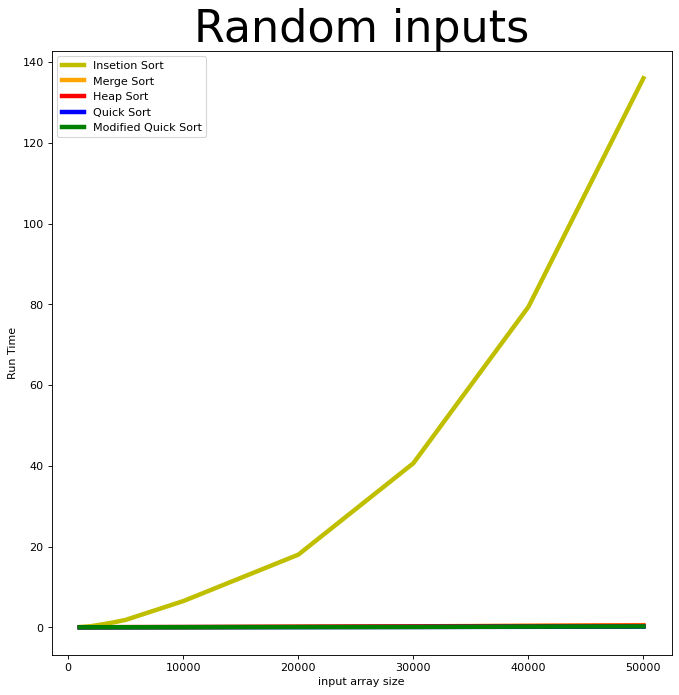

In [28]:
# graph
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

plt.plot(input_size_of_array, list(insertionsorttime.values()), "y",linewidth = 4)
plt.legend(["Insetion Sort"])
plt.plot(input_size_of_array,list(mergesorttime.values()),color = "orange",linewidth = 4 )
plt.legend(["Merge Sort"])
plt.plot(input_size_of_array, list(heapsorttime.values()), "r",linewidth = 4)
plt.legend(["Heap Sort"])
plt.plot(input_size_of_array, list(quicksorttime.values()), "b",linewidth = 4)
plt.legend(["Quick Sort"])
plt.plot(input_size_of_array, list(modifiedquicksorttime.values()), "g",linewidth = 4)
plt.legend(["Merge Sort","Heap Sort","Quick Sort","Modified Quick Sort"])
plt.legend(["Insetion Sort","Merge Sort","Heap Sort","Quick Sort","Modified Quick Sort"])
plt.title("Random inputs", fontsize = 40)
plt.xlabel("input array size")
plt.ylabel("Run Time")

In [9]:
input_sorted_array = [10,50,100,500,1000,1500,2000,2500,3000]
for i in input_sorted_array:
    n= i
    array = random_number_generator(n)
    array = modified_quicksort(array)
    
    starttime1 = time()
    res = quicksort(array)
    executiontime1 = (time()-starttime1)
    sortedquicksorttime[n] = executiontime1
    
    starttime2 = time()
    res = insertionsort(array)
    executiontime2 = (time()-starttime2)
    sortedinsertionsorttime[n] = executiontime2
    
    starttime3 = time()
    res = mergeSort(array)
    executiontime3 = (time()-starttime3)
    sortedmergesorttime[n] = executiontime3
    
    starttime4 = time()
    res = heapSort(array)
    executiontime4 = (time()-starttime4)
    sortedheapsorttime[n] = executiontime4
    
    starttime5 = time()
    res = modified_quicksort(array)
    executiontime5 = (time()-starttime5)
    sortedmodifiedquicksorttime[n] = executiontime5


In [10]:
print("Insertion Sort runtimes =\n",list(sortedinsertionsorttime.values()),"\n")
print("Heap Sort runtimes = \n", list(sortedheapsorttime.values()),"\n")
print("Merge Sort runtimes = \n", list(sortedmergesorttime.values()),"\n")
print("Quick Sort runtimes = \n", list(sortedquicksorttime.values()),"\n")
print("Modified Quick Sort runtimes = \n", list(sortedmodifiedquicksorttime.values()))    

Insertion Sort runtimes =
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.007995128631591797, 0.0] 

Heap Sort runtimes = 
 [0.0, 0.0, 0.0, 0.008006095886230469, 0.008000850677490234, 0.007999897003173828, 0.016002416610717773, 0.023990869522094727, 0.0400240421295166] 

Merge Sort runtimes = 
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.008001089096069336, 0.01598525047302246, 0.008000612258911133, 0.015999794006347656] 

Quick Sort runtimes = 
 [0.0, 0.0, 0.0, 0.021834850311279297, 0.07188296318054199, 0.1679990291595459, 0.28805065155029297, 0.520054817199707, 0.664074182510376] 

Modified Quick Sort runtimes = 
 [0.0, 0.0, 0.0, 0.0, 0.008541345596313477, 0.008001327514648438, 0.007997751235961914, 0.008001565933227539, 0.007982254028320312]


Text(0, 0.5, 'Run Time')

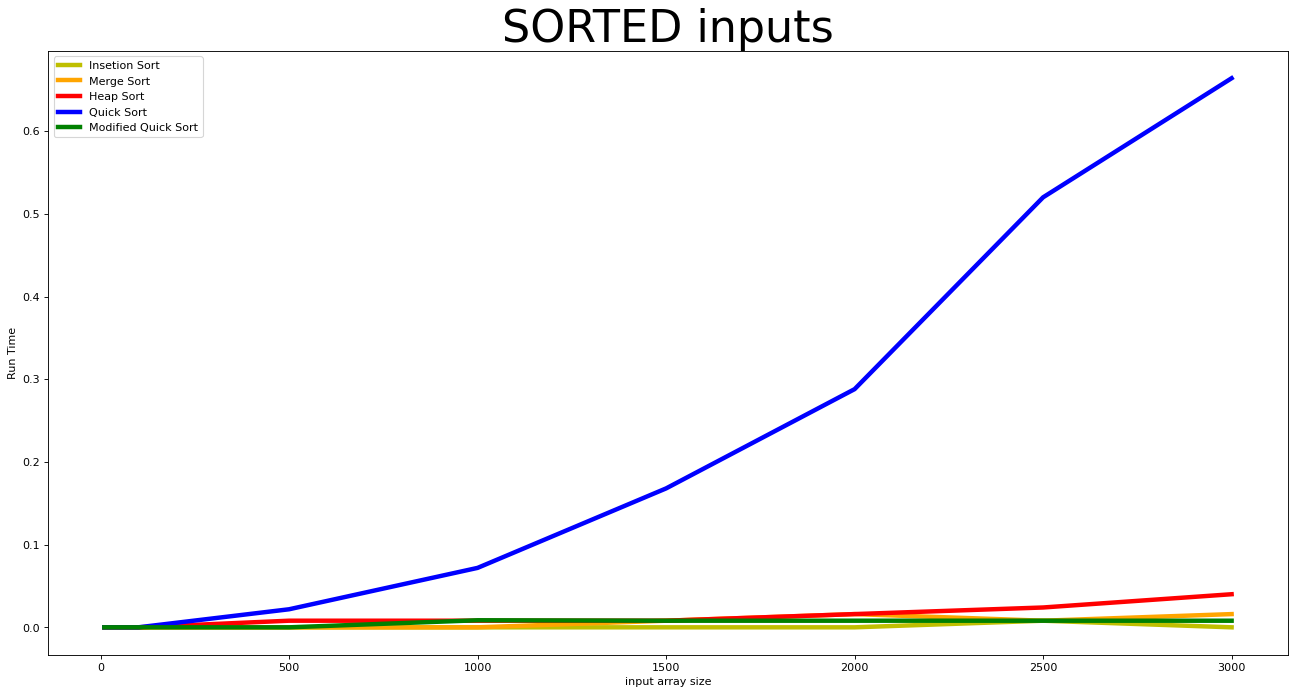

In [11]:
# graph
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
input_sorted_array = [10,50,100,500,1000,1500,2000,2500,3000]
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')

plt.plot(input_sorted_array, list(sortedinsertionsorttime.values()), "y",linewidth = 4)
plt.legend(["Insetion Sort"])
plt.plot(input_sorted_array,list(sortedmergesorttime.values()),color = "orange",linewidth = 4 )
plt.legend(["Merge Sort"])
plt.plot(input_sorted_array, list(sortedheapsorttime.values()), "r",linewidth = 4)
plt.legend(["Heap Sort"])
plt.plot(input_sorted_array, list(sortedquicksorttime.values()), "b",linewidth = 4)
plt.legend(["Quick Sort"])
plt.plot(input_sorted_array, list(sortedmodifiedquicksorttime.values()), "g",linewidth = 4)
plt.legend(["Insetion Sort","Merge Sort","Heap Sort","Quick Sort","Modified Quick Sort"])
plt.title("SORTED inputs", fontsize = 40)
plt.xlabel("input array size")
plt.ylabel("Run Time")

In [12]:
input_sorted_array = [10,50,100,500,1000,1500,2000,2500,3000]
for i in input_sorted_array:
    n= i
    array = random_number_generator(n)
    array.sort(reverse = True)
    
    starttime1 = time()
    res = quicksort(array)
    executiontime1 = (time()-starttime1)
    reversesortedquicksorttime[n] = executiontime1
    
    starttime2 = time()
    res = insertionsort(array)
    executiontime2 = (time()-starttime2)
    reversesortedinsertionsorttime[n] = executiontime2
    
    starttime3 = time()
    res = mergeSort(array)
    executiontime3 = (time()-starttime3)
    reversesortedmergesorttime[n] = executiontime3
    
    starttime4 = time()
    res = heapSort(array)
    executiontime4 = (time()-starttime4)
    reversesortedheapsorttime[n] = executiontime4
    
    starttime5 = time()
    res = modified_quicksort(array)
    executiontime5 = (time()-starttime5)
    reversesortedmodifiedquicksorttime[n] = executiontime5


In [13]:
print("Insertion Sort runtimes =\n",list(reversesortedinsertionsorttime.values()),"\n")
print("Heap Sort runtimes = \n", list(reversesortedheapsorttime.values()),"\n")
print("Merge Sort runtimes = \n", list(reversesortedmergesorttime.values()),"\n")
print("Quick Sort runtimes = \n", list(reversesortedquicksorttime.values()),"\n")
print("Modified Quick Sort runtimes = \n", list(reversesortedmodifiedquicksorttime.values()))    

Insertion Sort runtimes =
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] 

Heap Sort runtimes = 
 [0.0, 0.0, 0.0, 0.008009195327758789, 0.008199214935302734, 0.016001224517822266, 0.016002893447875977, 0.024003982543945312, 0.039994001388549805] 

Merge Sort runtimes = 
 [0.0, 0.0, 0.0, 0.008006811141967773, 0.008000373840332031, 0.0, 0.015984535217285156, 0.008001089096069336, 0.016013383865356445] 

Quick Sort runtimes = 
 [0.0, 0.0, 0.0, 0.013830423355102539, 0.07200312614440918, 0.16802167892456055, 0.2800486087799072, 0.4480552673339844, 0.7295355796813965] 

Modified Quick Sort runtimes = 
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.008000612258911133, 0.00800013542175293, 0.01135563850402832, 0.007999897003173828]


Text(0, 0.5, 'Run Time')

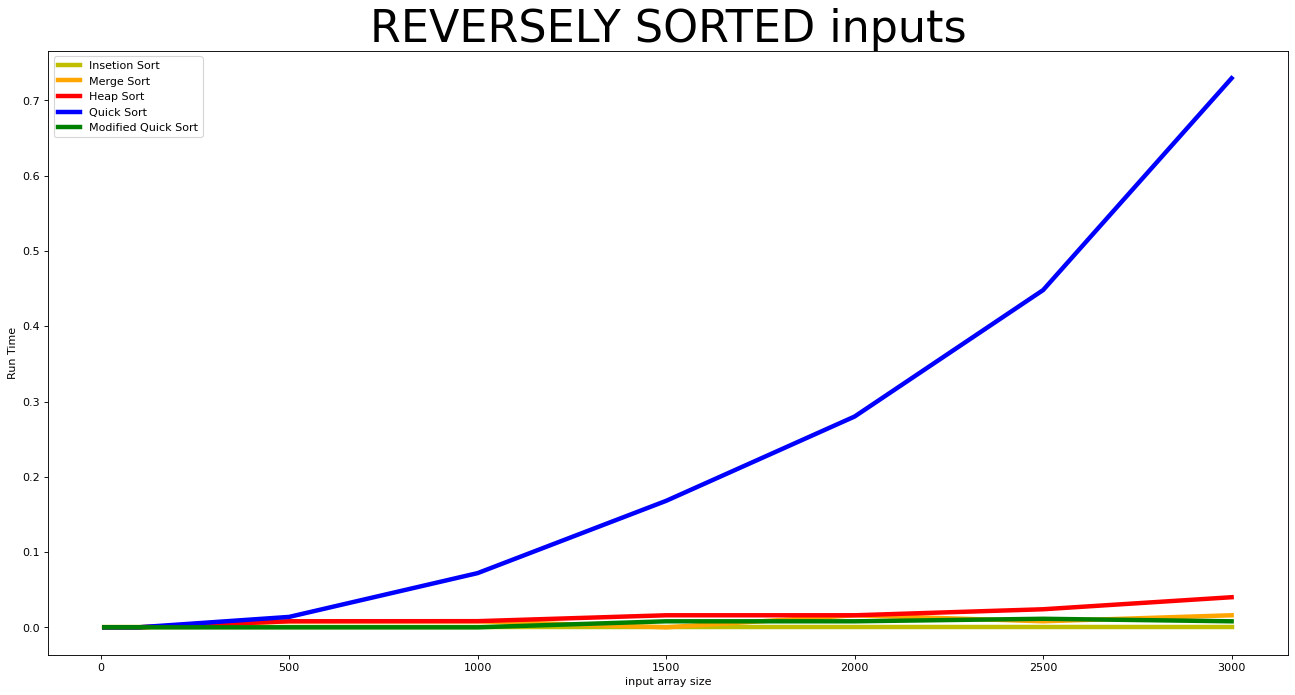

In [14]:
# graph
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
input_sorted_array = [10,50,100,500,1000,1500,2000,2500,3000]
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')

plt.plot(input_sorted_array, list(reversesortedinsertionsorttime.values()), "y",linewidth = 4)
plt.legend(["Insetion Sort"])
plt.plot(input_sorted_array,list(reversesortedmergesorttime.values()),color = "orange",linewidth = 4 )
plt.legend(["Merge Sort"])
plt.plot(input_sorted_array, list(reversesortedheapsorttime.values()), "r",linewidth = 4)
plt.legend(["Heap Sort"])
plt.plot(input_sorted_array, list(reversesortedquicksorttime.values()), "b",linewidth = 4)
plt.legend(["Quick Sort"])
plt.plot(input_sorted_array, list(reversesortedmodifiedquicksorttime.values()), "g",linewidth = 4)
plt.legend(["Insetion Sort","Merge Sort","Heap Sort","Quick Sort","Modified Quick Sort"])
#plt.legend(["Insetion Sort"])
plt.title("REVERSELY SORTED inputs", fontsize = 40)
plt.xlabel("input array size")
plt.ylabel("Run Time")